# Codeology Machine Learning Workshop Pt. 1
## 3/5/19

## Hosted by and maintained by [Codeology](https://www.codeology.club). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu), [Micah Harrison](mailto:mharrison08@berkeley.edu), and [Sai Kapuluru](mailto:saikapuluru@berkeley.edu).


### Table Of Contents
* [Introduction](#intro)
    * [What Is A Model?](#what_model)
    * [Why Make A Model?](#why_model)
* [Linear Regression](#linear_regression)
    * [Simple Linear Regression](#simple)
    * [Loss and the Line of Best Fit](#loss)
    * [Ordinary Least Squares](#ols)
    * [Making the Model](#making_model)
    * [Interpreting the Model](#interpreting_model)
    * [Assessing the Model](#assessment)
        * [Coefficient of Determination ($R^2$)](#r_squared)
        * [Residual Plots](#residual_plots)
    * [When Can I Use A Linear Model?](#when_to_use)
    * [Multiple Linear Regression](#multiple)
* [Fitting](#fitting)
    * [Underfitting](#underfitting)
        * [Data Transformation](#data_transformation)
        * [Polynomial Regression](#polynomial)
    * [Overfitting](#overfitting)
        * [$R^2$ and Overfitting](#r_squared_overfitting)
        * [Overfitting Demo](#overfitting_demo)
* [Validation](#validation)
    * [Training Error and Test Error](#error)
* [Recap](#recap)
* [Exercises](#exercises)




In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo
from scipy.optimize import curve_fit

<a id='intro'></a>
## Introduction

Welcome to **Codeology**'s FIRST EVER WORKSHOP!!! Woohoooo! This is very exciting stuff, and we'll be getting into more exciting topics throughout the rest of the notebook! Hopefully, you're here for the Introduction to Machine Learning workshop, and if you aren't, too bad (haha). We're going to start from the ground up, and work our way to pretty in-depth and incredibly useful topics in Machine Learning today! Let's get into it!

### Cool Demos

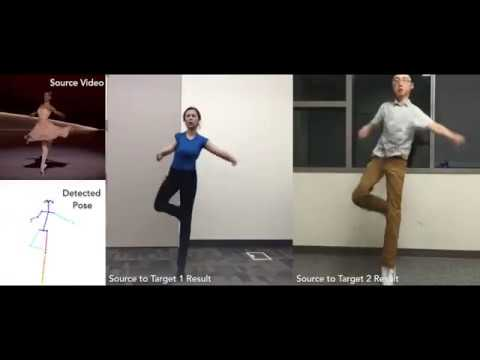

In [44]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('PCBTZh41Ris')

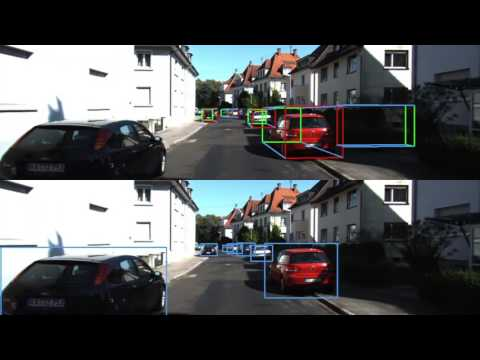

In [46]:
YouTubeVideo('O9OMIL0NwYk')

<a id='machine-learning'></a>
## What is Machine Learning?

### Ask Audience Here

Wikipedia definition: "Machine learning is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence"

## Machine Learning in the Context of Other Subfields

<img src='images/AI-vs-ML-vs-Deep-Learning.png' width=1000/>

As you can see, Machine Learning exists within AI, and is the overall subset containing Deep Learning-- all buzzwords you might've heard recently. We'll be getting to some specific subsets of ideas in Machine Learning today, Linear Regression, Fitting, Training/Validation/Testing, and get into more complex models in next week's workshop! The reason we're starting with a **Linear Regression model** today is because it's one of the **most fundamental** models in Machine Learning, and the process of analyzing this model today can be easily generalized to more complex models we'll learn in the future.

So, we'll begin our journey into Machine Learning by taking a close look at the **Linear Regression model**, and how useful it is in a variety of different problems/situations we see today!

<a id='intro'></a>
## Introduction to Models
**Thought Experiment**: Imagine you've just met an alien who is on a mission to catalog and describe all life on Earth. They've asked you to describe what a "horse" is. How would you describe this to them?

<a id='what_model'></a>
### What Is A Model?
A model is a simplification of reality. You want it to be general enough that it can accurately describe more than just a handful of examples of what it's supposed to represent.

<table bgcolor=white><tr>
    <td><img src='images/model_reality.png' width=400 /></td>
    <td width=100></td>
    <td><img src='images/model_reality_2.png' width=400 /></td>
</tr></table>

Besides describing classes of things, like *horse*, *orange tabby cat*, or *genders*, models can also describe the relationship between things. Some of these might be familiar to you:
<table>
    <tr><td>Newton's Second Law</td><td>$F = ma$</td></tr>
    <tr><td>Hooke's Law</td><td>$F = -kx$</td></tr>
    <tr><td>Position of a falling ball</td><td>$y(t) = \frac{1}{2}at^2$</td></tr>
</table>

<a id='why_model'></a>
### Why Make A Model?
The examples above may give you an idea of what kinds of models you'd want to make. You could make a model to describe something, whether that be a class of objects, like cats, or the relationship between multiple things, like mass, acceleration and force in Newton's Second Law. Once you have a model, you might want to use it to make predictions. As an example, maybe you'd like to be able to make a good guess for someone's weight based on their height – you could make a model that describes the relationship between weight and height and use that model to predict weights.

There's one thing you should always keep in mind! Just because you can make a model describing the relationship between two variables, and even if you can use this model to predict the value of one variable based on the value of the other, it doesn't mean that one causes the other. You may have heard this before as the difference between **correlation** and **causation**. A classic example is the relationship between ice cream sales and murder rates. Turns out, when ice cream sales rise, so do murder rates. Does this mean ice cream *causes* people to commit murder? Or get murdered? Nope!

Today, we're going to learn how to make a linear model to describe the relationship between variables!

<a id='linear_regression'></a>
## Linear Regression
**Linear regression** is a method of making linear models. Linear models is one kind of model, in which the relationship between the explanatory variables and the response variable can be described by a linear function. For now, you can just think of a linear function as a straight line, which takes us to *simple linear regression*.

<a id='simple'></a>
### Simple Linear Regression
**Simple linear regression** is a special case of linear regression in which you only have one explanatory variable. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks!

$$y = mx+b$$

Here, $y$ is the **response** or **dependent** variable we're trying to predict, and $x$ is an **explanatory** or **independent** variable used to predict $y$. In the case of our weight and height example, $y$ would represent weight, while $x$ represents height.

Using known $x$'s, we want to accurately predict $y$ using the right $m$ and $b$.

<a id='loss'></a>
### Loss and the Line of Best Fit
How do we figure out what $m$ and $b$ are? We do this by defining a *loss function*. The **loss function** is a function that measures how far off our model's estimated values are from the true values. We want our model to be as accurate as possible, so that means we want to minimize the error our model makes in predicting values. In other words, we want to minimize the loss. Another name for the line that minimizes the error is the **line of best fit**. It's a pretty descriptive name, since it's the line that fits our data the best. The *loss function* helps us define what is *best fit*. 

<img src='images/simple_linear.png' width=400>


<a id='ols'></a>
### Ordinary Least Squares
In the case of linear regression, we use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. A **residual** is the difference between the predicted value and the observed value for a given $x$. For a given observation $(x_i, y_i)$, the residual $e_i$ is calculated as:

$$ \underbrace{e_{i}}_{error} = \underbrace{y_i}_{actual} - \underbrace{\hat{y_i}}_{predicted} = y_i - mx_i - b$$

**Question**: Can you think of why we would want to *square* the residuals and sum them instead of just minimizing their sum?


Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - mx_i - b)^2$$

By minimizing this function, we can solve for slope $m$ and the intercept $b$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus, so we'll skip that part for now, but if you want to look into it more on your own you can check out [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $m$ and $b$ can be solved as:

$$\begin{aligned}
\hat{b}&=\bar {y}-\hat{m}\,{\bar{x}},\\
\hat{m}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

This is pretty complicated! Luckily, you don't need to know any of this to make a linear model, but this is here for reference if you're interested in the math behind what we'll be getting into today. 

<a id='making_model'></a>
### Making the Model
In linear regression, the response variable should be continuous. The explanatory variables *can* be discrete and even categorical, and in a future lecture you'll learn how to use categorical variables in your models, but in simple linear regression they need to be continuous. For today we'll just be working with continuous variables! 

Run the cell below to find the dataset we found to work with!

In [36]:
mpg = pd.read_csv("./data/mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in a later part of today's lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 

Try making some scatter plots of different variables as your `x` and `mpg` as your `y` using the `mpg_train` dataset below!

*Hint:* Hitting `shift-tab` with the cursor on the name of a function will bring up helpful documentation about how to use the function

In [35]:
mpg_train.plot.scatter(...)

ValueError: Must pass DataFrame with boolean values only

`sklearn`'s `linear_model` module makes it really easy to make linear models! There's a lot of different types of linear models implemented in the `linear_model` module, which you can take a look at [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) if you're interested, but for today we'll be using `LinearRegression`, which we've imported for you in the cell below. Try reading the documentation to figure out what the `fit()` function expects as input to correctly fit our model to the `mpg_train` data!

*Hint:* if you want to select a subset of columns from a dataframe, pass in a list of column names, like `df[['col1', 'col2]]`

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = ...
Y = ...

# Fit the model to the data
linear_model.fit(X, Y)

TypeError: float() argument must be a string or a number, not 'ellipsis'

Once you've got it working you'll notice that it seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [17]:
linear_model.coef_, linear_model.intercept_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've provided the skeleton for a helper function called `overlay_simple_linear_model`. Try to fill out the function so that it plots a scatterplot with the linear model overlaid on top.

*Hint:* If you press `tab` after a `[object].` or `[package].`, Jupyter will show you a list of valid functions defined for that object type or package.

In [18]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape((-1, 1)) # an array of integers between 0 and the maximum value of the x_name column
    y = linear_model.____ # replace ___ with correct function 
    
    
    data.plot.scatter(...) # scatter plot of x_name vs. y_name
    
    plt.plot(x, y, color='red')
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

In [19]:
# If you wrote the function above correctly, this should produce a scatterplot with a line through it
overlay_simple_linear_model(mpg_train, ..., "mpg", linear_model)

KeyError: Ellipsis

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanator?

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is? One way of measuring how well your model fits the data is the $R^2$ coefficient, or the **coefficient of determination**. Basically, what the $R^2$ represents is the proportion of variation in the response variable that is explained by the explanatory variables. If you want to look into the mathematical definition of $R^2$, you can check out the [Wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination).

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [20]:
linear_model.score(...) # you'll only need to use variables that we've already defined

TypeError: score() missing 1 required positional argument: 'y'

Woohoo! If you used `displacement`, our model accurately predicts 66% of the variation in `mpg`. Is this good? Since $R^2$ is a proportion, it's value is always between $0$ and $1$. An $R^2$ value of $0$ would mean that none of the variation of $y$ is explained by $x$, and our model does not explain anything about the data! Our model is essentially guessing the same value each time. An $R^2$ value of $1$ means that our model perfectly fits our data! So, the closer our $R^2$ value is to $1$, the better it fits our data. However, we'll see later how that is not always what we might want (overfitting), but we'll get into more of that later!

In the cell below, try making different simple linear models using different functions and seeing their corresponding $R^2$. Make sure to stick with one explanatory variable for now!

**Exercise:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [21]:
linear_model2 = LinearRegression()

X2 = ...

... # fit linear_model2

r_squared = ...

r_squared

Ellipsis

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. 

Fill in the blanks in the `plot_simple_residuals()` function, so we can take a look at the residual plot.

In [27]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X = ...
    Y = ...
    residuals = ...
    
    plt.scatter(X, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

In [28]:
plot_simple_residuals(mpg_train, ..., 'mpg', linear_model)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

As you can see, the residuals aren't scattered randomly around the x-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='when_to_use'></a>
### When To Use A Linear Model
Let's talk about some of the assumptions of linear regression, so you know when it's appropriate to use one.
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.

## In Summary

Hopefully, you now have the understanding behind how linear regression models work, and how they are optimized against a given data set (loss functions), but also how they're not always the most optimal model to use (curved data, categorical data). Therefore, whenever we want to use this model, we have to make sure **we analyze** the data beforehand to ensure that our model is not underexplaining or overexplaining on our data. We'll talk more about how that works in the next section, and how we can fix that if that is ever the case.

<a id='fitting'></a>
# Fitting

<a id='underfitting'></a>
## Underfitting

So by now you might be thinking, how do I know when to use simple linear regression or multiple linear regression? Let's take a look again at the simple linear regression model using `displacement` as our explanatory variable.

In [37]:
%matplotlib inline

linear_model = LinearRegression()
X = mpg_train[["displacement"]]

linear_model.fit(X, Y)
overlay_simple_linear_model(mpg_train, 'displacement', 'mpg', linear_model);

TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

You might notice that the simple linear model doesn't really fit the data that well. The line of best fit clearly misses out on a good chunk of the points towards the middle of the scatter plot, so if we had to use this line to predict `mpg` for new values of `displacement`, our model might not make the best predictions.

When a model is too simple to accurately describe the relationship between variables, we say that it is **underfitting**.

We can also take a look at the residual plot of this linear model.

In [ ]:
plot_simple_residuals(mpg_train, 'displacement', 'mpg', linear_model)

**Question**: What do you notice about the residual plot?

**Answer**: The residual plot shows us that we're overpredicting for the intermediate values for `displacement` and underpredicting for the higher values of `displacement`. This suggests that a different model may be better suited for this data, since our model is not accurately capturing the shape of our data. 

**So, how do we fix this?**

<a id='data_transformation'></a>
### Data Transformation

One way to fix this error in a best fit line is to transform our explanatory variable! You might think that the shape of the scatterplot could be modeled better by a model of the form $y = a\log{x} + b$.  We can preliminarily test whether it would make sense to make such a model by looking at the scatterplot comparing `mpg` and `log(displacement)`.

In [ ]:
plt.scatter(np.log(mpg_train['displacement']), mpg_train['mpg'])
plt.title("Scatter Plot of log(displacement) vs. mpg")
plt.xlabel("log(displacement)")
plt.ylabel("mpg");

As we can see, transforming our data can allowed us to see a more linear relationship between $log(displacement)$ and $mpg$, so let's make a linear regression model based off of that! We can do this by transforming our $x$ into $\log{x}$ and then running linear regression in the same way we did before!

In [ ]:
logarithmic_model = LinearRegression()
X = mpg_train[["displacement"]]

transformedX = np.log(X)
logarithmic_model.fit(transformedX, Y)

x = np.arange(min(X.values), max(X.values)).reshape((-1, 1))
transformedx = np.log(x)
predicted = logarithmic_model.predict(transformedx) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x, predicted, color='red')
plt.title("Logarithmic Model: displacement vs. mpg")
plt.show()

Let's take a look at the residuals for this model.

In [ ]:
residuals = Y - logarithmic_model.predict(transformedX)

plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot: log(displacement) vs. mpg")
plt.xlabel("displacement")
plt.ylabel("Residuals")
plt.show()

<a id='polynomial'></a>
### Polynomial Regression
Alternatively, you might have thought the curve of the line reminded you of a **quadratic** function of the form $y = ax^2 + bx + c$. We can make a model of this form by simply doing multiple linear regression with our two explanatory variables as $x$ and $x^2$, which we can make by transforming $x$!

In [ ]:
polynomial_model = LinearRegression()
X = mpg_train[["displacement"]]

X_squared = np.power(X, 2)
combinedX = np.hstack((X, X_squared)) # we're horizontally stacking X_squared, because we're adding columns
polynomial_model.fit(combinedX, Y)

x = np.arange(min(X.values), max(X.values)).reshape((-1, 1))
x_squared = np.power(x, 2)
combinedx = np.hstack((x, x_squared))
predicted = polynomial_model.predict(combinedx) # predicted values

mpg_train.plot.scatter("displacement", "mpg")
plt.plot(x, predicted, color='red') 
plt.title("Quadratic Model: displacement vs. mpg")
plt.show()

In [ ]:
residuals = Y - polynomial_model.predict(combinedX)

plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot: (displacement)^2 and displacement vs. mpg")
plt.xlabel("displacement")
plt.ylabel("Residuals")
plt.show()

As we can see above, the residual plot shows points much more randomly scattered around the line $y=0$, and we don't see any patterns that don't resemble a random scatter in this plot. This model is clearly much better than the simple linear model, as depicted visually through seeing the 'fit' of the newer model on the dataset and through the random scatter in the residual plot.

Clearly in this example, raising the complexity of our model allowed us to better fit our data!

<a id='overfitting'></a>
## Overfitting

So why stop at $y = ax^2 + bx + c$? Why not go even further and make a degree-15 polynomial model of the form $y = ax^{15} + bx^{14} + ... + c$?

In [ ]:
def polynomial_stack(X, degrees):
    """
    This function creates a matrix in which each column k contains X^(k+1), e.g. column 0 has X and column 3 has X^4
    
    X(array): an array representing a single column of data
    degrees: the highest degree polynomial to return
    
    returns a np.array of shape (len(X), degrees)
    """
    return np.hstack((np.power(X, i+1) for i in range(degrees)))
    
def polynomial_regression(data, x_name, y_name, degrees):
    """
    This function plots a polynomial regression model overlaid on a scatterplot of the original data.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    degrees(int): the degree of the polynomial to fit the model on
    
    returns the polynomial regression model
    """
    X = data[[x_name]]
    Y = data[[y_name]]
    X, Y = X/1000., Y
    poly = LinearRegression()
    X_stack = polynomial_stack(X, degrees)
    poly.fit(X_stack, Y)

    x = np.arange(min(X.values), max(X.values)+.001, .001).reshape((-1, 1))
    x_stack = polynomial_stack(x, degrees)
    predicted = poly.predict(x_stack)

    data.plot.scatter(x_name, y_name)
    plt.plot(1000*x, predicted, color='red')
    plt.title("Polynomial Degree " + str(degrees) + " Model: " + x_name + " vs. " + y_name)
    plt.show()
    return poly

In [ ]:
poly_3 = polynomial_regression(mpg_train, "displacement", "mpg", 3)
poly_15 = polynomial_regression(mpg_train, "displacement", "mpg", 15)

As we can see, we cover many more points than we did before with the simple linear regression (x vs y plot). **So why not keep doing this and make more and more complex regression lines (best-fit lines)?**

We refrain from making more and more complex regression lines because these lines are not only used to fit the sample we fit the model on, but we want to use it as a general descriptor of the relationship between these variables. If we wanted to use it to **predict** future points, it wouldn't work that well for most values. Looking at our last model, do you think it accurately describes the `mpg` of a car with `displacement = 75`?

We can imagine how this kind of discrepancy might be the cuase for error in other datasets when we try to get a line of best fit, as in those cases, we may not always know what is nonsensical output. For example, the dataset may not have as clear features as `displacement` and `mpg`, and as a result, you might not be able to determine when you've predicted an output that doesn't make any sense in the context of the data. Or maybe you won't be able to visualize it as easily as we can with only one explanatory variable.

This kind of situation is what we would call **overfitting** our model on our training data. Even though we can make a model fit perfectly on our training data, it doesn't generalize well with other data points, as a model is supposed to show a **generalization of reality**. The more complex model we used to fit our model this time isn't necessarily reflective of what we see happens in real world phenomenon.

<a id='r_squared_overfitting'></a>
### $R^2$ and Overfitting

Let's revisit the $R^2$ coefficient we talked about earlier today. We used it as a method of assessing the quality of our model, since it measures how well our model fits the data. Let's take a look at the $R^2$ values of the polynomial models from the section above; what do you notice about them?

In [ ]:
X = mpg_train[["displacement"]]
X_stack_3 = polynomial_stack(X/1000, 3)
print("Degree 3 Polynomial R^2: " + str(poly_3.score(X_stack_3, Y)))

X_stack_15 = polynomial_stack(X/1000, 15)
print("Degree 15 Polynomial R^2: " + str(poly_15.score(X_stack_15, Y)))

As we can see from the $R^2$ values, the higher degree of a polynomial we model our data on, the higher the $R^2$ value seems to be. However, if we recall from before, the definition of the $R^2$ value is based off of how well our model predicts the variation in our data. So, the closer our $R^2$ value is to 1, the more variation from our data is accounted in our model, meaning our model can easily be overfitting on our data (If we take into account nearly all the variation in our data, that must mean that our model is passing through very closely to all points). This doesn't necessarily imply that our model is overfitting on our data, as points in a straight line will have $R^2 = 1$ even with a simple linear model, but this is just to show that $R^2$ is sensitive to overfitting.

One value that exists to act as a measure of penalizing overfitting is the **adjusted $R^{2}$ value**. Now we won't be going into how it works in this particular lecture, but click [here](http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables) if you're interested in learning more about what it is! For now, we're just going to keep the focus more on the $R^{2}$ value, as this is the one more commonly used in real-world statistics.

So, to recap, the $R^2$ of a model can be a misleading measure of how well your model is doing! Just looking at the $R^2$ value of a model on its data can make you think the model is doing really well, when in reality, the model is just overfitting on the data!

<a id='overfitting_demo'></a>
### Overfitting Demo

Now, let's take a look at what overfitting looks like when looking at varying degrees of models on the same data points!

In [ ]:
overfittingDemo()

As we can see from above, as we our model's degree beyond a degree 3 model, our predicted model becomes more and more erratic, which isn't necessarily how the true data is distributed.

Now that we know lines of best fit can underfit and overfit our data, we may think we're in a bit of a predicament! **How can we determine what line of best fit best fits our data and generalizes the best with the world?**

The answer is, it's completely relative to your data set! There's no magic number for the maximum degree polynomial you can have when plotting your line of best-fit (though there can be extremes) and the same for the mimumum. However, a general trend for fitting follows something simliar to this chart:

<img src='images/trueError.png' width="400" height="400">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we see that the true error for our graph dips at a certain point, but continuously increases over time after that. What we're trying to do is determine a best-fit line that hovers as close as possible to the point of lowest true error.

**But what's a good strategy to find that?**

Something we call **Validation**!

<a id='validation'></a>
## Validation

So far we've talked a lot about what underfitting and overfitting are, and how to visually detect whether or not your model is doing one or the other. However, we haven't gone into any strategies into how we can achieve some kind of happy medium between underfitting and overfitting, so our model fits well against **the underlying distribution of our data** and also **generalizes well against other data points**.

We know how to accomplish the first part – by running linear regression and evaluating $R^2$, while potentially adding more explanatory variables, but how do we accomplish the second part? How can we check how well our model does on points it hasn't been trained on?

Ideally, we'd be able to just get more data to test whether our model is overfitting on our data, but that's not always possible. So, we instead separate the data that we have into different sets. In order to figure out what the best model is, we can train various models on a subset of our data, and then have some data set aside that we can evaluate each of our potential models against. The data we're training our models on is called the **training set**, while the data we evaluate our models on is the **validation set**. Once we've chosen the model that minimizes the error on our *validation set*, we can perform a final test of how good our model is on data that we've *never* seen before, the **test set**.

Now that might be a bit confusing to grasp at first, so we're going to break it down!

#### In order to verify how well our model is doing, we can split our initial data set that we're given into three different groups:
* **Training set:** The set of data points you use to fit your model.
* **Validation set:** The set of data points that you use to fine tune your model's parameters (aka "fine tuning your model's hyperparameters")
    * Hyperparameters are essentially the parameters your model uses, which in our case could be which degree polynomial to use
* **Test set:** The set of data points that you use to evaluate how well your model that was fit against your training set does against other "outside" data points

You may find that the terms **validation set** and **test set** are sometimes used interchangably in outside works concerning testing how accurate your model is, but we'll be using the formal definitions and uses of all 3 of the sets listed above.

So, instead of getting new data points to test our model against, we just split our initial data set into three groups- typically done in a 60/20/20 split ($60\%$ of data to training, $20\%$ to validation, and $20\%$ to testing). Here's a little visual of what we're trying to convey:

<img src="images/train-validate-test.png" width=400 height=400>

We're essentially just splitting up our dataset into 3 distinct datasets for future usage.

Once this splitting is done, we're able to follow the following steps through a process of validating the best model for your dataset.
1. Initially fit a model against our **training set**.
2. Use the **validation set** to provide information on which hyperparameters might be best tailored for your model (in our case, which coefficients and which degree polynomial might be the best to use) by repeatedly testing different models against this dataset. At the end, choose whichever hyperparameters for your model that are the most favorable for you (in our case, the most favorable hyperparamters are the ones that reduce as much loss as possible, but this won't necessarily always be the case).
3. Take the favorable model from step 2 and test the model against our **test set**. The result will be an unbiased indicator of how well our model does with "generalizing against other data points".

<a id='error'></a>
### Training Error and Test Error

As we can see, training a model, validating which hyperparameters are the best suited for our model, and then finally testing it to see it's final accuracy are all steps we can follow to create a model that no longer **underfits** or **overfits** on our data. So, how do we define which model performs the best against the validation set? By choosing the model that minimizes the error on the validation set! To begin, let's define a few terms:

* **Training error:** The error returned from running an error function on your model with your training set. In our case, we determine the MSE (mean squared error) from the data points in our training set to our model.
* **Test error:** The error returned from running an error function on your fine-tuned post-validation model with your test set. In our case, we still use the MSE to determine how accurate our model is doing against data points in our test set.
* **Mean Squared Error:** The error output from finding the average of all the squared magnitudes from all the predicted and actual outputs. This is the type of error "function" we use to calculate training and test errors. To get a better idea of what **MSE** is, take a look at the following picture:

<img src='images/mean_squared_error.png' width=400, height=400>

Now, these numerical values for **training error** and **test error** can also be measurements through which we can determine how well our model is doing on our data points. You can imagine that if we wanted to lower our training error, we'd want to better fit a model against our training points. However, as we talked about before, the more we try to fit a model against a dataset, the more likely we are to **overfit**. So, minimizing our **training error** isn't necessarily what we're typically trying to achieve. A good visualization that conveys what we're talking about is shown below:

<img src='images/training_vs_test_error.png' width="800" height="800">

As we increase in the model order (the max degree polynomial we use as a best fit line for our data), we can see that we lower our **training error**, which can be good in the beginning. We see that our test error is also minimized up until our model reaches degree 3 or so. However, as we continue to lower our **training error**, we see that our **test error** continues to increase. Now, we can see that we're beginning to **overfit** on our training data, and **not generalizing well** against other data points (in this case, our test set).

**Question:** Why do we conduct this entire process, and not just repeated test different models against our test set until we get the lowest error possible?

The reason we don't continuously test against our test set is because that would not only result in a biased evaluation of how well our model is doing, but also because our models would be able to **overfit** by repeatedly trying to lower our error from testing it on our test set. We want to prevent our model from **overfitting** on any data set, including the test set, as the test set is just something we made to conduct tests from our original data. There are limitless possibilities to what our test set could've been like, and so, there can be enough unpredicability within our test set that other test sets we could've made could produce totally different results. So, we try to refrain from testing repeatedly on the test set, and rather just test our final model on the test set to have a final verification on how well it's able to predict and generalize to other data points.

**In conclusion**, we can see that validation can be an incredibly useful process through which we create a model that fits, but doesn't overfit or underfit, on our data. We also see that different measurable quantities, such as training error and test error, can also be indicative of how well our model is doing at different periods of time, and see how well it's fitting against our data.

Let's do a demo with this on the data we've been using from the `mpg` dataset!

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X_validation = mpg_validation[["displacement"]]
Y_validation = mpg_validation[["mpg"]]
X_validation_stack_3 = polynomial_stack(X_validation/1000, 3)
pred_3 = poly_3.predict(X_validation_stack_3)
print("Degree 3 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_3)))

X_validation_stack_15 = polynomial_stack(X_validation/1000, 15)
pred_15 = poly_15.predict(X_validation_stack_15)
print("Degree 15 Polynomial validation error: " + str(mean_squared_error(Y_validation, pred_15)))

It seems like the degree 3 polynomial has lower error based on our validation set, so we will pick that as our final model of the two and evaluate it on our test set!

In [ ]:
X_test = mpg_test[["displacement"]]
Y_test = mpg_test[["mpg"]]
X_test_stack_3 = polynomial_stack(X_test/1000, 3)
pred_3 = poly_3.predict(X_test_stack_3)
print("Degree 3 Polynomial test error: " + str(mean_squared_error(Y_test, pred_3)))

<a id='recap'></a>
## Recap

Just to recap, here's a great visual that covers a lot of what we just went over in the Underfitting, Overfitting, and Validation sections in this notebook!

<img src='images/fit_graphs.png' width="1600" height="1600">

# Congratulations! You've learning the concepts of linear regression!

<a id='exercises'></a>
# Exercises

Now that you know how to train models on pieces of data, how to validate the model with a validation dataset, and how to test how well your chosen model is doing against a test dataset, we want you to construct some models/visualizations on the `mpg_train` dataset we've been working with! A quick tip we have for solving these problems: open up another window of this same notebook and scroll through that one so that you don't have to keep scrolling up and down on this one to fill out answers for functions that you might've forgotten how to use!

**Exercise 1:** Let's try to determine a correlation between two different variables in the `mpg` dataset! First, let's split the `mpg` dataset into a training set, validation set, and a test set. We didn't really go into the particular function that does this for you in this notebook, but you can scroll up and see how it's used (it's called `train_test_split`).

In [ ]:
# YOUR CODE HERE

**Exercise 2:** Now reconstruct the following scatter plot from the `mpg_train1` dataset.

<img src='images/exer_2_pic.png' width="400" height="400">

In [ ]:
# YOUR CODE HERE

**Exercise 3:** Draw a simple linear model through the graph you made right above. It should look something like what we've displayed below. *Hint: you can use the `overlay_simple_linear_model()` function*

<img src='images/exer_3_pic.png' width="400" height="400">

In [ ]:
# YOUR CODE HERE

**Exercise 4:** What are the coefficients and intercept for the model you used above?

In [ ]:
# Make sure your return the value of the coefficient, 
# not a list with the coefficient in it
coefficient = ...
intercept = ...

In [ ]:
assert np.isclose(coefficient, -0.16438784)
assert np.isclose(intercept, 40.2508769656186)

**Exercise 5:** Find the residual plot for the model and datapoints you plotted in the exercise above. The outcome should look something like the following:

<img src='images/exer_5_pic.png' width="400" height="400">

In [ ]:
# YOUR CODE HERE

**Exercise 6:** What does the above scatter plot say about the correlation between the `horsepower` of a car and the `mpg` of the car? How well does the model fit against the dataset?

YOUR ANSWER HERE

**Exercise 7:** Calculate the $R^{2}$ value between the two variables .

In [ ]:
R2_value = ...
R2_value

In [ ]:
assert np.isclose(R2_value, 0.6217949606638364)

Now that we've taken a look at what the data looks like, and ran a simple linear regression through it, let's conduct the steps of Validation to determine what's the best model for this dataset (**the one that generalizes the best and the one that covers the underlying trend between the two variables, not the noise**).

**Exercise 8:** Fit a variety of different models against the `mpg_train1` dataset to determine the model that best depicts the relationship between `horsepower` and `mpg`. Both **validation errors** and data visualizations can be good indicators in determining which regression model best fits your data. *(Hint: Refer to the functions `polynomial_regression()` and `polynomial_stack()` earlier in the notebook).*

In [ ]:
### Creating and testing different models ###

# A for loop might be really useful here to visualize models and training errors for different degree models

model_x, model_y = ...

**Exercise 9:** Basing off of the plots above and their respective training errors, which degree model did you determine was the best suited for your dataset?

In [ ]:
answer = ...

In [ ]:
assert answer in range(1, 11)

**Exercise 10:** Final question: now that we've verified which model fits our data the best, let's take a look at the **testing error** of the model against our test set. *(Hint: you will probably have to re-predict the model with `polynomial_regression()` and `polynomial_stack()`)*

In [ ]:
test_x, test_y = ...

### Congratulations! You've finished the exercises! You are officially a Machine Learner!